In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [12]:
# Focal Loss Function
def focal_loss(gamma=3.0, alpha=0.5):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        focal_loss = -y_true * (alpha * tf.math.pow(1 - y_pred, gamma) * tf.math.log(y_pred))
        return tf.reduce_sum(focal_loss, axis=-1)
    return focal_loss_fixed

In [13]:
# Define the MLP model with ReLU activation
def create_mlp_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [14]:
num_classes = 2

# Load dataset hasil oversampling ADASYN_Mild
file_path_oversampled_mild = 'D:\Tugas Akhir\Stroke\data_oversampled.csv'
df_oversampled_mild = pd.read_csv(file_path_oversampled_mild)

# Ganti koma dengan titik dan ubah tipe data ke float32 untuk kolom tertentu
columns_to_convert = ['age', 'avg_glucose_level', 'bmi']
df_oversampled_mild[columns_to_convert] = df_oversampled_mild[columns_to_convert].replace(',', '.', regex=True).astype('float32')

# Pisahkan fitur dan target untuk dataset hasil oversampling ADASYN_Mild
X_oversampled_mild = df_oversampled_mild.drop('stroke', axis=1)
y_oversampled_mild = df_oversampled_mild['stroke']

# Mengonversi target menjadi one-hot encoding untuk ADASYN_Mild
y_oversampled_one_hot_mild = tf.keras.utils.to_categorical(y_oversampled_mild, num_classes)

# Pastikan tipe data float32 untuk fitur
X_oversampled_mild = X_oversampled_mild.astype('float32')


# Load dataset hasil PCA-KMeans_Mild
file_path_pca_kmeans_mild = 'D:/Tugas Akhir/Stroke/data_klastering_mild.csv'
df_pca_kmeans_mild = pd.read_csv(file_path_pca_kmeans_mild)

# Pisahkan fitur dan target untuk dataset hasil PCA-KMeans_Extreme
X_pca_kmeans_mild = df_pca_kmeans_mild.drop(['stroke', 'Cluster'], axis=1)
y_pca_kmeans_mild = df_pca_kmeans_mild['stroke']

# Mengonversi target menjadi one-hot encoding untuk PCA-KMeans_Extreme
y_pca_kmeans_one_hot_mild = tf.keras.utils.to_categorical(y_pca_kmeans_mild, num_classes)

# Pastikan tipe data float32 untuk fitur
X_pca_kmeans_mild = X_pca_kmeans_mild.astype('float32')

In [15]:
df_oversampled_mild

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,1,0.8804,0,0,1,0,1,0,1,0.6311,0.3073,1,0,0,0,1
5767,0,0.8583,0,0,1,0,1,0,1,0.1403,0.2548,1,0,0,0,1
5768,1,0.9298,0,0,1,0,1,0,0,0.0904,0.1904,1,0,0,0,1
5769,1,0.9009,0,0,1,0,1,0,1,0.2097,0.2386,1,0,0,0,1


In [16]:
df_pca_kmeans_mild

,PC1_Mild,PC2_Mild,PC3_Mild,PC4_Mild,PC5_Mild,PC6_Mild,PC7_Mild,PC8_Mild,PC9_Mild,PC10_Mild,PC11_Mild,PC12_Mild,PC13_Mild,stroke,Cluster
0,0.6926,4.0708,0.3417,0.7812,1.0250,0.6278,-0.8607,0.9356,-0.2131,-1.4320,1.5473,0.5602,0.7762,1,2
1,0.4421,1.6706,1.8276,0.2550,-0.5347,0.8670,-2.0532,-0.6343,1.1984,-1.5214,1.1508,1.6021,-0.8357,1,2
2,-1.3311,0.8545,0.0392,1.7320,-0.8391,-0.4613,0.8264,-0.2044,-1.5955,0.5407,0.3727,-0.8274,0.1769,1,1
3,3.3196,-0.7450,1.3980,-0.6132,-1.0033,0.0041,0.2591,-0.6595,0.6592,1.7617,-0.1222,-0.3803,0.6730,1,3
4,0.4167,2.5185,-0.2267,-0.7751,0.8693,-0.1486,-0.5903,0.8871,-0.7679,-0.3027,-0.7917,-1.2277,-0.2772,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,-0.6712,0.7452,-0.2484,-1.3044,-0.2256,2.0571,-0.2588,-1.0283,0.0932,1.4101,0.9403,-1.4748,-0.0339,1,1
5767,-1.0920,0.5871,-0.9453,-1.7240,-0.8046,1.7979,-0.8156,-0.7408,1.0261,0.3382,-0.7461,-0.1986,-0.6412,1,1
5768,-1.0018,-0.2050,-0.9286,-1.7955,-1.0573,1.8794,-0.9614,0.6046,-1.1045,1.1336,0.1106,-0.0875,-0.5738,1,1
5769,-1.0152,0.0248,-0.6967,-1.8820,-0.7302,1.6022,-0.7976,-0.8075,0.1756,1.4050,0.6051,-0.4647,-0.5880,1,1


In [17]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_oversampled_mild['stroke'].value_counts()
# Tampilkan output
print("Data Pada ADASYN 'stroke':")
print(stroke_counts)

# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_pca_kmeans_mild['stroke'].value_counts()
# Tampilkan output
print("Data Pada PCA-KMeans 'stroke':")
print(stroke_counts)

Data Pada ADASYN 'stroke':
stroke
0    3481
1    2290
Name: count, dtype: int64
Data Pada PCA-KMeans 'stroke':
stroke
0    3481
1    2290
Name: count, dtype: int64


In [18]:
# Pisahkan data ADASYN menjadi set pelatihan dan pengujian
X_train_oversampled_mild, X_test_oversampled_mild, y_train_oversampled_mild, y_test_oversampled_mild = train_test_split(X_oversampled_mild, y_oversampled_mild, test_size=0.2, random_state=42)

# Pisahkan data PCA-KMeans menjadi set pelatihan dan pengujian
X_train_pca_kmeans_mild, X_test_pca_kmeans_mild, y_train_pca_kmeans_mild, y_test_pca_kmeans_mild = train_test_split(X_pca_kmeans_mild, y_pca_kmeans_mild, test_size=0.2, random_state=42)


In [19]:
import numpy as np
# Menghitung jumlah kelas 0 dan 1 pada ADASYN (data latih)
unique_oversampled_train, counts_oversampled_train = np.unique(y_train_oversampled_mild, return_counts=True)
num_class_0_oversampled_train = counts_oversampled_train[unique_oversampled_train == 0][0]
num_class_1_oversampled_train = counts_oversampled_train[unique_oversampled_train == 1][0]

# Menghitung jumlah kelas 0 dan 1 pada ADASYN (data uji)
unique_oversampled_test, counts_oversampled_test = np.unique(y_test_oversampled_mild, return_counts=True)
num_class_0_oversampled_test = counts_oversampled_test[unique_oversampled_test == 0][0]
num_class_1_oversampled_test = counts_oversampled_test[unique_oversampled_test == 1][0]

print("Data Latih ADASYN Mild:")
print(f"Jumlah data latih: {len(y_train_oversampled_mild)}")
print(f"Jumlah kelas 0: {num_class_0_oversampled_train}")
print(f"Jumlah kelas 1: {num_class_1_oversampled_train}")
print("\nData Uji ADASYN Mild:")
print(f"Jumlah data uji: {len(y_test_oversampled_mild)}")
print(f"Jumlah kelas 0: {num_class_0_oversampled_test}")
print(f"Jumlah kelas 1: {num_class_1_oversampled_test}")
print("===========================================")

# Menghitung jumlah kelas 0 dan 1 pada PCA-KMeans (data latih)
unique_pca_kmeans_train, counts_pca_kmeans_train = np.unique(y_train_pca_kmeans_mild, return_counts=True)
num_class_0_pca_kmeans_train = counts_pca_kmeans_train[unique_pca_kmeans_train == 0][0]
num_class_1_pca_kmeans_train = counts_pca_kmeans_train[unique_pca_kmeans_train == 1][0]

# Menghitung jumlah kelas 0 dan 1 pada PCA-KMeans (data uji)
unique_pca_kmeans_test, counts_pca_kmeans_test = np.unique(y_test_pca_kmeans_mild, return_counts=True)
num_class_0_pca_kmeans_test = counts_pca_kmeans_test[unique_pca_kmeans_test == 0][0]
num_class_1_pca_kmeans_test = counts_pca_kmeans_test[unique_pca_kmeans_test == 1][0]

print("Data Latih PCA-KMeans Mild:")
print(f"Jumlah data latih: {len(y_train_pca_kmeans_mild)}")
print(f"Jumlah kelas 0: {num_class_0_pca_kmeans_train}")
print(f"Jumlah kelas 1: {num_class_1_pca_kmeans_train}")
print("\nData Uji PCA-KMeans Mild:")
print(f"Jumlah data uji: {len(y_test_pca_kmeans_mild)}")
print(f"Jumlah kelas 0: {num_class_0_pca_kmeans_test}")
print(f"Jumlah kelas 1: {num_class_1_pca_kmeans_test}")
print("===========================================")

Data Latih ADASYN Mild:
Jumlah data latih: 4616
Jumlah kelas 0: 2788
Jumlah kelas 1: 1828

Data Uji ADASYN Mild:
Jumlah data uji: 1155
Jumlah kelas 0: 693
Jumlah kelas 1: 462
Data Latih PCA-KMeans Mild:
Jumlah data latih: 4616
Jumlah kelas 0: 2788
Jumlah kelas 1: 1828

Data Uji PCA-KMeans Mild:
Jumlah data uji: 1155
Jumlah kelas 0: 693
Jumlah kelas 1: 462


In [20]:
# Menetapkan bentuk input dan jumlah kelas berdasarkan fitur dan target untuk ADASYN
input_shape_adasyn = X_train_oversampled_mild.shape[1:]
num_classes_adasyn = y_oversampled_one_hot_mild.shape[1]  # Disesuaikan untuk mendapatkan jumlah kelas secara dinamis
y_train_oversampled_one_hot = tf.keras.utils.to_categorical(y_train_oversampled_mild, num_classes_adasyn)
y_test_oversampled_one_hot = tf.keras.utils.to_categorical(y_test_oversampled_mild, num_classes_adasyn)

# Menetapkan bentuk input dan jumlah kelas berdasarkan fitur dan target untuk PCA-KMeans
input_shape_pca_kmeans = X_train_pca_kmeans_mild.shape[1:]
num_classes_pca_kmeans = y_pca_kmeans_one_hot_mild.shape[1]  # Disesuaikan untuk mendapatkan jumlah kelas secara dinamis
y_train_pca_kmeans_one_hot = tf.keras.utils.to_categorical(y_train_pca_kmeans_mild, num_classes_pca_kmeans)
y_test_pca_kmeans_one_hot = tf.keras.utils.to_categorical(y_test_pca_kmeans_mild, num_classes_pca_kmeans)

In [21]:
# Create the MLP model for ADASYN
model_adasyn = create_mlp_model(input_shape_adasyn, num_classes_adasyn)

# Compile the model with Focal Loss
model_adasyn.compile(optimizer='adam',
                     loss=focal_loss(),
                     metrics=['accuracy'])

# Create the MLP model for PCA-KMeans
model_pca_kmeans = create_mlp_model(input_shape_pca_kmeans, num_classes_pca_kmeans)

# Compile the model with Focal Loss
model_pca_kmeans.compile(optimizer='adam',
                         loss=focal_loss(),
                         metrics=['accuracy'])


In [22]:
# Calculate class weights for ADASYN
class_weights_adasyn = {0: num_class_1_oversampled_train / num_class_0_oversampled_train, 1: 1.0}

# Print model summary for ADASYN
model_adasyn.summary()

# Train the model for ADASYN with class weights
history_adasyn = model_adasyn.fit(X_train_oversampled_mild, y_train_oversampled_one_hot, epochs=50, batch_size=32,
                                  validation_split=0.2, class_weight=class_weights_adasyn)
# Evaluate the model on the test set for ADASYN
test_loss_adasyn, test_acc_adasyn = model_adasyn.evaluate(X_test_oversampled_mild, y_test_oversampled_one_hot)
print(f'Test Loss (ADASYN) Mild: {test_loss_adasyn}, Test Accuracy (ADASYN) Mild: {test_acc_adasyn}')

# Predict classes for the test set for ADASYN
y_pred_probabilities_adasyn = model_adasyn.predict(X_test_oversampled_mild)
y_pred_adasyn = y_pred_probabilities_adasyn.argmax(axis=1)

# Convert one-hot encoded y_test back to numerical values for ADASYN
y_true_adasyn = np.array(y_test_oversampled_mild)

# Calculate precision, recall, and F1-score for ADASYN
report_adasyn = classification_report(y_true_adasyn, y_pred_adasyn)
print("Classification Report (ADASYN) Mild:\n", report_adasyn)

# Confusion Matrix for ADASYN
conf_matrix_adasyn = confusion_matrix(y_true_adasyn, y_pred_adasyn)
print("Confusion Matrix (ADASYN) Mild:\n", conf_matrix_adasyn)


# Calculate class weights for PCA-KMeans
class_weights_pca_kmeans = {0: num_class_1_pca_kmeans_train / num_class_0_pca_kmeans_train, 1: 1.0}

# Print model summary for PCA-KMeans
model_pca_kmeans.summary()

# Train the model for PCA-KMeans with class weights
history_pca_kmeans = model_pca_kmeans.fit(X_train_pca_kmeans_mild, y_train_pca_kmeans_one_hot, epochs=50, batch_size=32,
                                          validation_split=0.2, class_weight=class_weights_pca_kmeans)

# Evaluate the model on the test set for PCA-KMeans
test_loss_pca_kmeans, test_acc_pca_kmeans = model_pca_kmeans.evaluate(X_test_pca_kmeans_mild, y_test_pca_kmeans_one_hot)
print(f'Test Loss (PCA-KMeans) Mild: {test_loss_pca_kmeans}, Test Accuracy (PCA-KMeans) Mild: {test_acc_pca_kmeans}')

# Predict classes for the test set for PCA-KMeans
y_pred_probabilities_pca_kmeans = model_pca_kmeans.predict(X_test_pca_kmeans_mild)
y_pred_pca_kmeans = y_pred_probabilities_pca_kmeans.argmax(axis=1)

# Convert one-hot encoded y_test back to numerical values for PCA-KMeans
y_true_pca_kmeans = y_test_pca_kmeans_mild.to_numpy()

# Calculate precision, recall, and F1-score for PCA-KMeans
report_pca_kmeans = classification_report(y_true_pca_kmeans, y_pred_pca_kmeans)
print("Classification Report (PCA-KMeans) Mild:\n", report_pca_kmeans)

# Confusion Matrix for PCA-KMeans
conf_matrix_pca_kmeans = confusion_matrix(y_true_pca_kmeans, y_pred_pca_kmeans)
print("Confusion Matrix (PCA-KMeans) Mild:\n", conf_matrix_pca_kmeans)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 10434 (40.76 KB)
Trainable params: 10434 (40.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


116/116 [==============================] - 6s 11ms/step - loss: 0.0280 - accuracy: 0.7221 - val_loss: 0.0355 - val_accuracy: 0.7175
Epoch 2

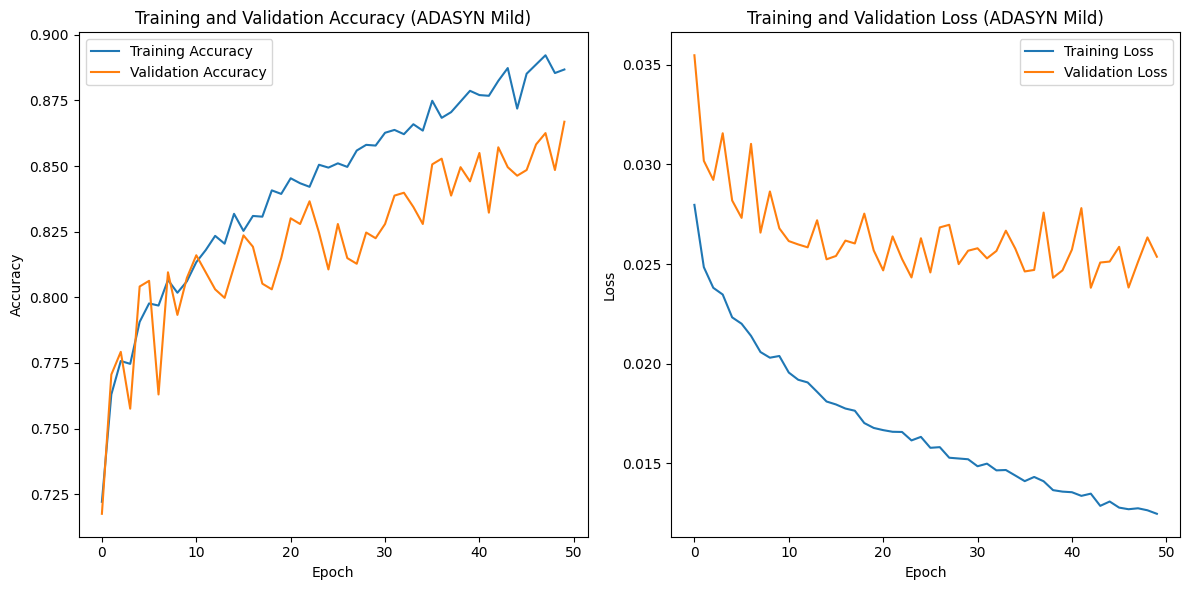

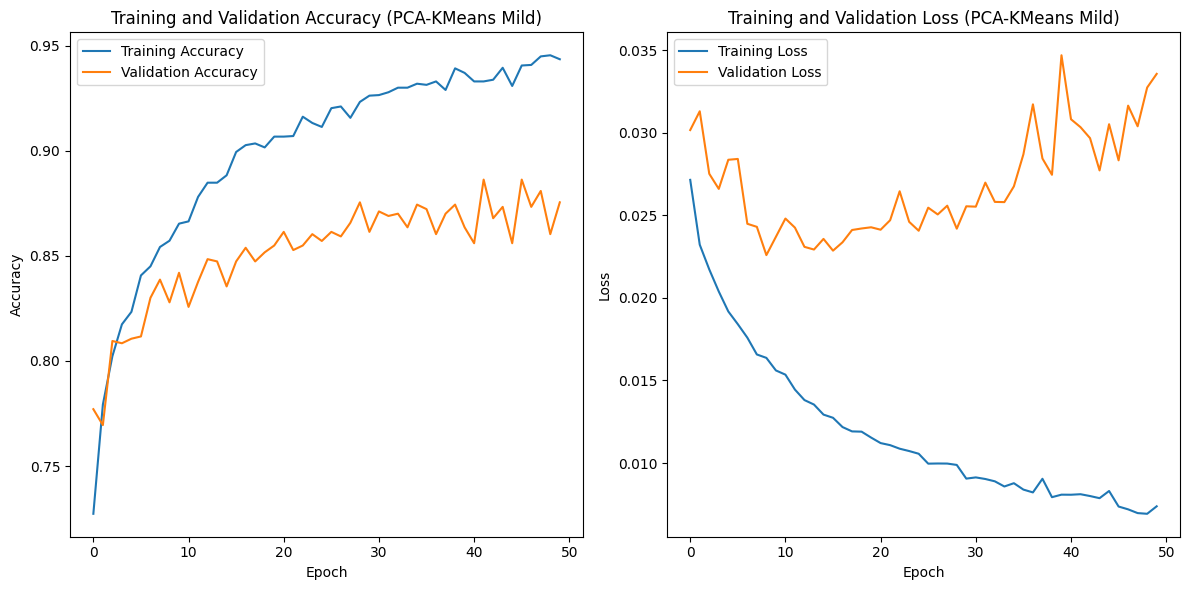

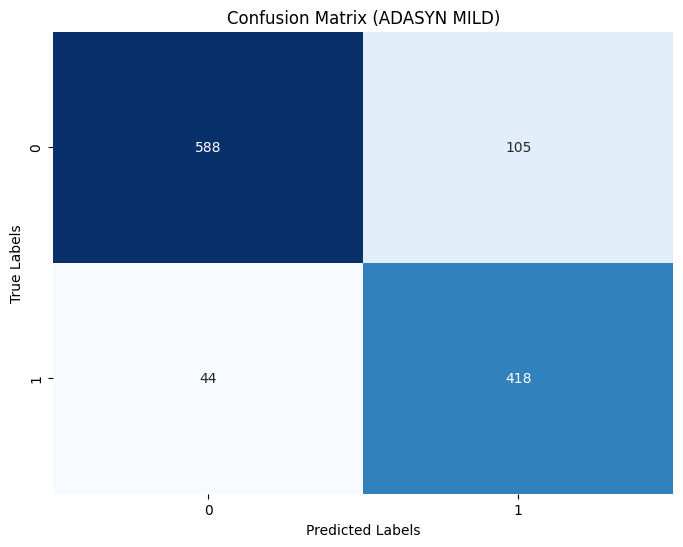

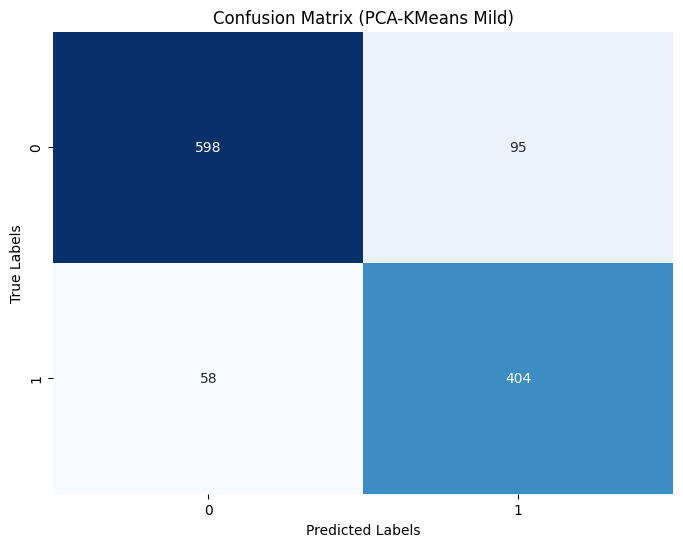

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
# Visualisasi Akurasi dan Loss untuk Adasyn Mild
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_adasyn.history['accuracy'], label='Training Accuracy')
plt.plot(history_adasyn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (ADASYN Mild)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_adasyn.history['loss'], label='Training Loss')
plt.plot(history_adasyn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (ADASYN Mild)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi Akurasi dan Loss untuk PCA-KMeans Mild
plt.figure(figsize=(12, 6))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_pca_kmeans.history['accuracy'], label='Training Accuracy')
plt.plot(history_pca_kmeans.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (PCA-KMeans Mild)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_pca_kmeans.history['loss'], label='Training Loss')
plt.plot(history_pca_kmeans.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (PCA-KMeans Mild)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Visualisasi Confusion Matrix untuk ADASYN Mild
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adasyn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (ADASYN MILD)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualisasi Confusion Matrix untuk PCA-KMeans Mild
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca_kmeans, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (PCA-KMeans Mild)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
